<a href="https://colab.research.google.com/github/Aimerlee123/Python-TeamProject/blob/aimerlee/%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0_%EC%9D%B4%EC%9A%A9%ED%98%84%ED%99%A9_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [4]:
bike_6=pd.read_csv('/content/drive/MyDrive/data/서울특별시공공자전거이용정보(시간대별)_22.06.csv',engine='python')


In [5]:
bike_9=pd.read_csv('/content/drive/MyDrive/data/서울특별시공공자전거이용정보(시간대별)_22.09.csv',engine='python')

In [7]:
biketotal=pd.concat([bike_6,bike_9],ignore_index=True)
biketotal.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,NaN,~10대,1,48.30,0.46,1999.70,10
1,2022-06-01,0,2059,2059. 보라매공원 정문,정기권,NaN,~10대,1,27.47,0.23,991.00,9
2,2022-06-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,20.63,0.20,868.17,3
3,2022-06-01,0,750,750. 연의근린공원 건너편,정기권,NaN,~10대,1,13.97,0.13,560.00,4
4,2022-06-01,0,755,755. 목동1단지아파트 상가 앞,정기권,NaN,~10대,1,12.15,0.14,590.00,3


6월과 9월 자료를 합친다

In [8]:
biketotal['연령대코드'].isna().sum()

0

연령대 코드 분서하기전 연령대 코드에 결측치 있는 지 확인

In [9]:
biketotal['연령대코드']=biketotal['연령대코드'].str.replace('~',"")
biketotal.drop('탄소량',axis=1)
biketotal.drop('운동량',axis=1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,NaN,10대,1,0.46,1999.70,10
1,2022-06-01,0,2059,2059. 보라매공원 정문,정기권,NaN,10대,1,0.23,991.00,9
2,2022-06-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,10대,1,0.20,868.17,3
3,2022-06-01,0,750,750. 연의근린공원 건너편,정기권,NaN,10대,1,0.13,560.00,4
4,2022-06-01,0,755,755. 목동1단지아파트 상가 앞,정기권,NaN,10대,1,0.14,590.00,3
...,...,...,...,...,...,...,...,...,...,...,...
7805007,2022-09-30,23,1911,1911. 구로디지털단지역 앞,정기권,M,기타,1,0.53,2277.98,19
7805008,2022-09-30,23,2102,2102. 봉림교 교통섬,정기권,M,기타,1,0.17,740.80,3
7805009,2022-09-30,23,2337,2337. 대모산입구역 2번출구 앞,정기권,M,기타,1,0.14,598.60,3
7805010,2022-09-30,23,1414,1414. 사가정역 2번출구,정기권,M,기타,1,0.71,3070.00,19


쓰지 않을 운동량과 탄소량 정보는 제거 

# 연령대 분석

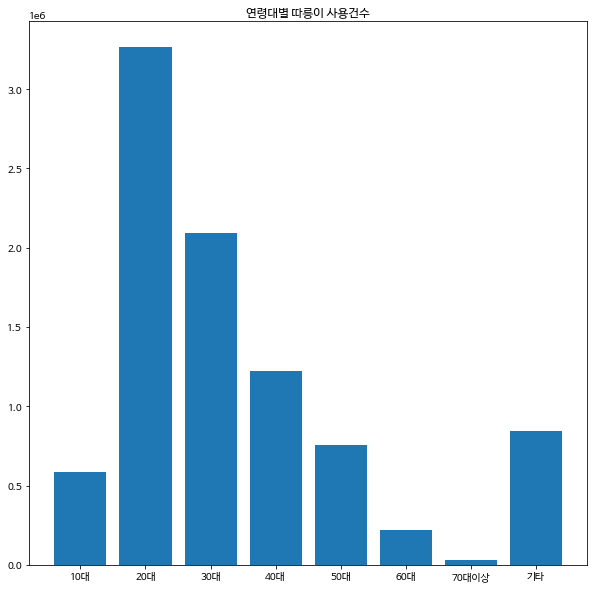

In [10]:
bike1 = biketotal.copy()
age_group=bike1.groupby(by=["연령대코드"],as_index=False)
age_sum=age_group["이용건수"].sum()
plt.figure(figsize=(10,10))
plt.title("연령대별 따릉이 사용건수")
plt.bar(age_sum['연령대코드'],age_sum['이용건수'])
plt.show()
     

연령대 코드로 그룹해서 각 그룹에 들어있는 이용건수를 더해줘 
연령대별 이용건수 그래프로 표현한다. 

Text(0.5, 1.0, '연령대별 이용비율')

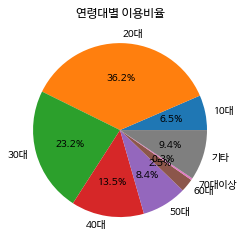

In [11]:
plt.pie(age_sum['이용건수'],labels = age_sum['연령대코드'],autopct='%.1f%%')
plt.title('연령대별 이용비율')

공공자전거를 주로 이용하는 연령대는 20대임을 알 수 있다. 
즉 광고 타겟을 20대로 잡는 것이 효과적임을 알 수 있다. 

In [12]:
bike1.groupby('연령대코드').agg({'이동거리(M)':['mean'],'이용시간(분)':['mean']})

,이동거리(M),이용시간(분)
,mean,mean
연령대코드,,
10대,2638.373575,23.322616
20대,3141.886261,26.095471
30대,3147.097797,26.334134
40대,3309.689657,28.252879
50대,3284.378336,27.555946
60대,3192.916976,28.599670
70대이상,3041.438970,30.464029
기타,3117.022088,27.294216


연령대 코드별 이동거리와 이용시간의 평균을 본다. 

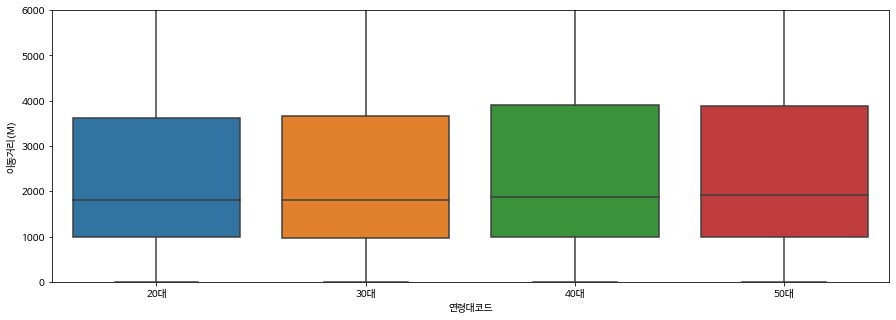

In [13]:
data_2 = bike1[(bike1['연령대코드'] != '10대') & (bike1['연령대코드'] != '60대') & (bike1['연령대코드'] != '70대')]
plt.figure(figsize=(15, 5))
sns.boxplot(data = data_2, x = '연령대코드', y = '이동거리(M)', order = ['20대', '30대', '40대', '50대'])
plt.ylim([0, 6000]);
plt.show()

평균적으로 이용객들은 3km 거리를 움직이는 것을 알 수 있다.
따라서 이용객이 많은 정거장 3km 주변 정거장에 광고를 붙이면 효율적일 것이다. 

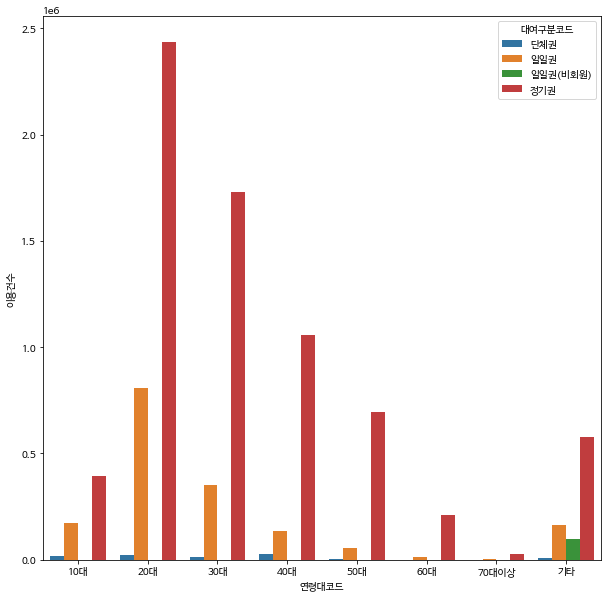

In [14]:
df3=bike1.groupby(['연령대코드','대여구분코드'],as_index=False)['이용건수'].sum()
plt.figure(figsize=(10,10))
sns.barplot(x='연령대코드', y='이용건수', hue='대여구분코드',data=df3 )

모든 연령에서 정기권 구메가 많은 것을 볼 수 있다.
즉 앱에서 정기권 구매시 광고시청하면 요금 할인을 해준다면 광고 노출을 늘릴 수 잇다. 

# 성별 분석

In [15]:
biketotal['성별'].isna().sum()

2623952

성별로 분석하기전에 결측치 확인

In [16]:
bike2=biketotal.copy()
bike2.dropna(subset=['성별'],inplace=True)
bike2['성별']=bike2['성별'].str.replace('f','F')
bike2['성별']=bike2['성별'].str.replace('m','M')

dropna()함수를 통해 결측치를 제거한다. 

In [17]:
bike2.groupby('성별').agg({'이동거리(M)':['mean'],'이용시간(분)':['mean']})

,이동거리(M),이용시간(분)
,mean,mean
성별,,
F,3176.220528,28.098729
M,3075.372329,25.203807


성별로 나누어 봐도 평균적으로 3km 움직이므로 가장 유동인구가 많은 정류소 주변 3km 정류소에 광고를 부착한다면 효과적이다.




In [18]:
df1=bike2.groupby(['연령대코드','성별'],as_index=False)['이용건수'].sum()
df1

,연령대코드,성별,이용건수
0,10대,F,144878
1,10대,M,345966
2,20대,F,869522
3,20대,M,1005467
4,30대,F,551752
5,30대,M,836024
6,40대,F,310070
7,40대,M,541402
8,50대,F,192734
9,50대,M,331741


Text(0.5, 1.0, '성별별 이용비율')

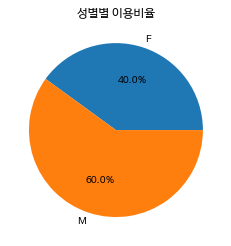

In [19]:
sex_group=bike2.groupby(["성별"],as_index=False)
sex_sum=sex_group["이용건수"].sum()
plt.pie(sex_sum['이용건수'],labels = sex_sum['성별'],autopct='%.1f%%')
plt.title('성별별 이용비율')

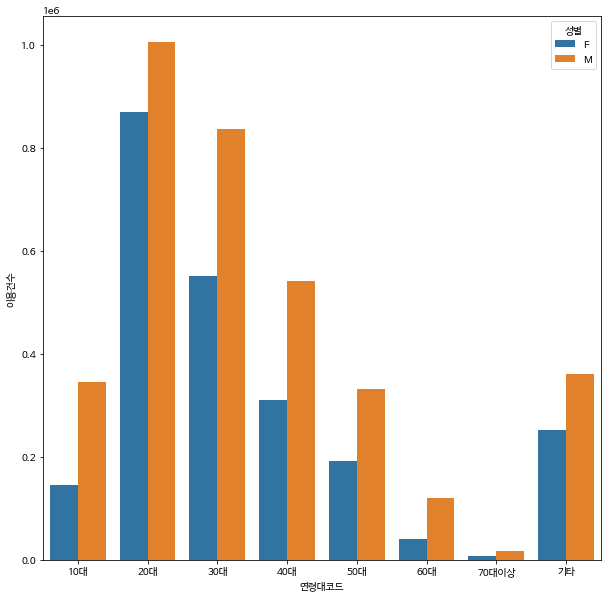

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(x='연령대코드', y='이용건수', hue='성별',data=df1 )

20대 남성과 여성의 이용량이 제일 많은 것을 확인할 수 있다. 20대에서는 다른 나이대에 비해 남여간의 차이가 작으므로  광고의 타깃을 20대 남성과 여성으로 잡는 것이 효율 적이다. 

# 가장 많은 사용량이 있던 이용소

In [21]:
bike3=biketotal.copy()

In [22]:
df3=bike3.groupby(['연령대코드','대여소번호','대여소명'],as_index=False)['이용건수'].sum()
df3.columns=['연령대코드','대여 대여소번호','대여소명','이용건수']
df3

,연령대코드,대여 대여소번호,대여소명,이용건수
0,10대,102,102. 망원역 1번출구 앞,227
1,10대,103,103. 망원역 2번출구 앞,225
2,10대,104,104. 합정역 1번출구 앞,129
3,10대,105,105. 합정역 5번출구 앞,78
4,10대,106,106. 합정역 7번출구 앞,239
...,...,...,...,...
21369,기타,5858,5858. 영등포역5번출구,63
21370,기타,9992,사대문센터,1
21371,기타,9998,9998. 영남주차장 정비센터,6
21372,기타,9999,상담센터,34


연령대 코드와 대여소 변호 대여소 명으로 그룹하고 각 그룹별 이용건수를 더한다. 

In [23]:
df3['연령대코드'].isna().sum()

0

In [24]:
df3['대여 대여소번호'].isna().sum()

0

In [25]:
df3['대여소명'].isna().sum()

0

In [26]:
gu_data=pd.read_csv('/content/drive/MyDrive/data/공공자전거대여소정보수정2212.csv')
gu_data.columns =['대여 대여소번호','대여 대여소명','자치구','상세주소','위도','경도','설치시기','거치대수1','거치대수2','운영방식']
gu_data.shape

(2715, 10)

대여소 정보에서 대여소 번호와 자치구를 불러온다. 

In [27]:
dataset1 = gu_data[['대여 대여소번호','자치구']]
dataset1

,대여 대여소번호,자치구
0,302,종로구
1,303,종로구
2,305,종로구
3,307,종로구
4,308,종로구
...,...,...
2710,3691,강동구
2711,3692,강동구
2712,3694,강동구
2713,3698,강동구


In [31]:
dataset1['대여 대여소번호'].isna().sum()

0

In [32]:
dataset1['자치구'].isna().sum()

0

우리가 필요한 대여소 번호와 자치구 정보만을 추출한다. 

6월 9월 이용건수가 들어있는 데이터와 대여소 번호를 맞추어 결합한다. 
대여소가 어느 자치구에 있는지 알수 있다.

In [33]:
m_data_total=pd.merge(df3,dataset1,on='대여 대여소번호')
m_data_total

,연령대코드,대여 대여소번호,대여소명,이용건수,자치구
0,10대,102,102. 망원역 1번출구 앞,227,마포구
1,20대,102,102. 망원역 1번출구 앞,4514,마포구
2,30대,102,102. 망원역 1번출구 앞,2898,마포구
3,40대,102,102. 망원역 1번출구 앞,1011,마포구
4,50대,102,102. 망원역 1번출구 앞,574,마포구
...,...,...,...,...,...
21082,30대,4641,4641. 아메리칸센터,82,성동구
21083,40대,4641,4641. 아메리칸센터,42,성동구
21084,50대,4641,4641. 아메리칸센터,18,성동구
21085,60대,4641,4641. 아메리칸센터,13,성동구


In [34]:
df3_20=m_data_total[m_data_total['연령대코드']=='20대']
df3_20

,연령대코드,대여 대여소번호,대여소명,이용건수,자치구
1,20대,102,102. 망원역 1번출구 앞,4514,마포구
9,20대,103,103. 망원역 2번출구 앞,3762,마포구
17,20대,104,104. 합정역 1번출구 앞,1820,마포구
25,20대,105,105. 합정역 5번출구 앞,1370,마포구
33,20대,106,106. 합정역 7번출구 앞,4226,마포구
...,...,...,...,...,...
21054,20대,4314,4314. 탑성마을 버스정거장 옆,12,서초구
21060,20대,4322,4322.서울추모공원 입구,11,서초구
21067,20대,4580,4580. 국회3문,282,영등포구
21074,20대,4584,4584. 국회2문,194,영등포구


광고 타겟을 20대로 설정했기에 20대가 어느 지역에서 가장 많이 사용했느지 알아낸다. 

In [35]:
df3_20.sort_values(by='이용건수',ascending=False,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [36]:
gu_group=df3_20.groupby(by=["자치구"],as_index=False)
gu_sum=gu_group["이용건수"].sum()

자치구로 그룹하고 각 그룹의 이용건수를 더해준다. 

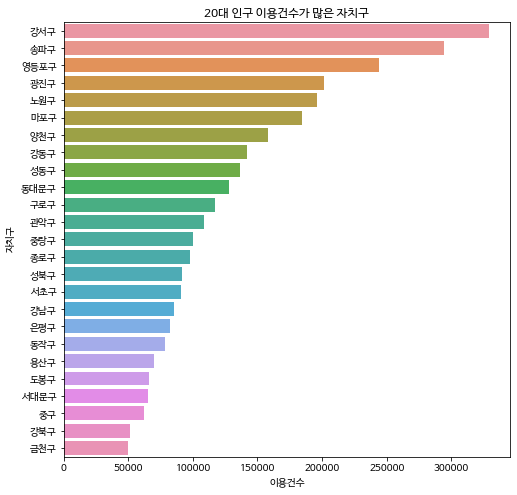

In [37]:
gu_sum.sort_values(by='이용건수',ascending=False,inplace=True)
plt.figure(figsize=(8,8))
sns.barplot(data=gu_sum,x='이용건수',y='자치구')
plt.title("20대 인구 이용건수가 많은 자치구")
plt.show()

이용건수로 분류하고 가장 많은 구부터 순서대로 시각화 한다. 
강서 송파 영등포에서 이용량이 가장 많음을 알 수 있다. 

자치구 별로 구분하기 위해 그룹으로 묶는다

In [38]:
grouped=df3_20.groupby('자치구')

In [39]:
gangsu=grouped.get_group('강서구')
gangsutop5=gangsu.head(5)

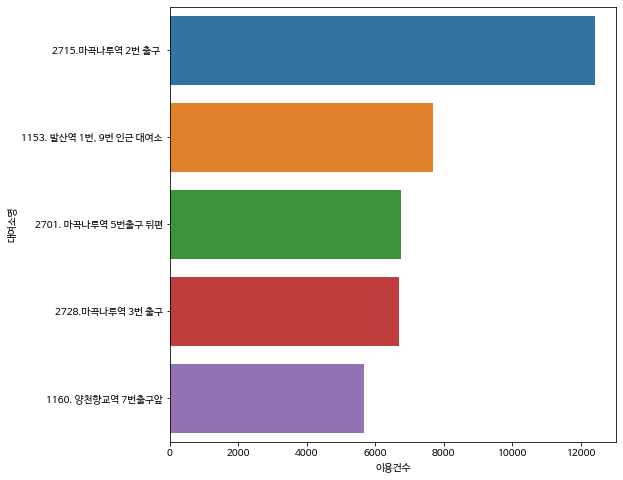

In [40]:
plt.figure(figsize=(8,8))
sns.barplot(data=gangsutop5,x='이용건수',y='대여소명')
plt.show()

In [43]:
songpa=grouped.get_group('송파구')
songpatop5=songpa.head(5)


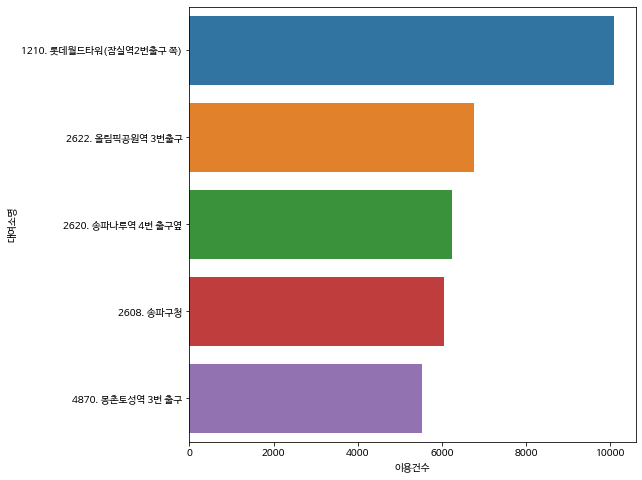

In [44]:
plt.figure(figsize=(8,8))
sns.barplot(data=songpatop5,x='이용건수',y='대여소명')
plt.show()

In [48]:
yeo=grouped.get_group('영등포구')
yeo5=yeo.head(5)


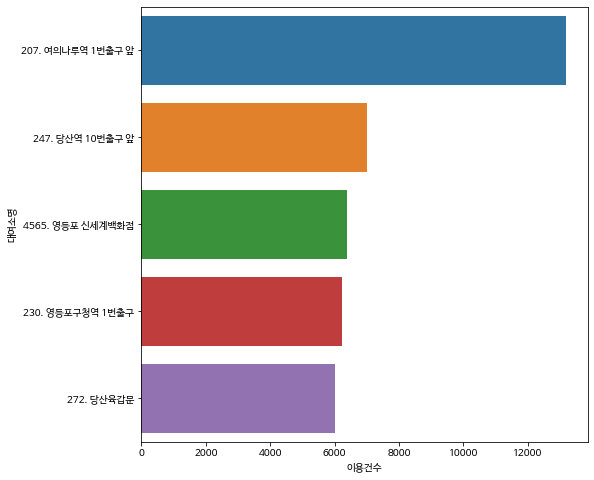

In [49]:
plt.figure(figsize=(8,8))
sns.barplot(data=yeo5,x='이용건수',y='대여소명')
plt.show()

In [45]:
kwanak=grouped.get_group('관악구')
kwana5=kwanak.head(5)


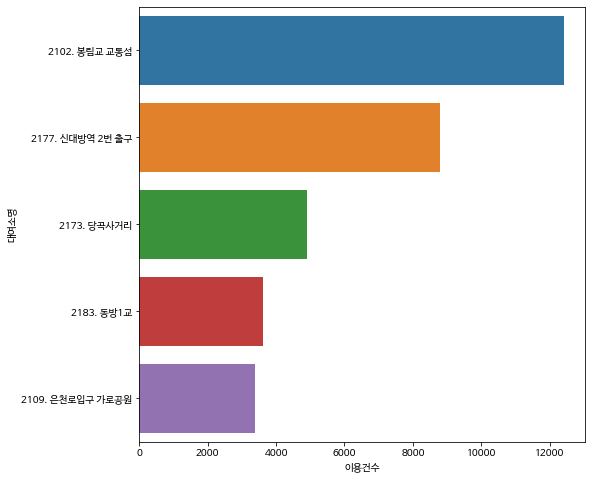

In [46]:
plt.figure(figsize=(8,8))
sns.barplot(data=kwana5,x='이용건수',y='대여소명')
plt.show()

# 자치구별 연령대 인구 분석

In [57]:
guager=pd.read_csv('/content/drive/MyDrive/data/자치구별연령별인구(추계인구).csv')
guager.shape

(78, 24)

In [58]:
guage=guager.copy()
guage['10대']=guage['10~14세']+guage['15~19세']
guage.drop(['10~14세','15~19세'],axis=1,inplace=True)
guage['20대']=guage['20~24세']+guage['25~29세']
guage.drop(['20~24세','25~29세'],axis=1,inplace=True)
guage['30대']=guage['30~34세']+guage['35~39세']
guage.drop(['30~34세','35~39세'],axis=1,inplace=True)
guage['40대']=guage['40~44세']+guage['45~49세']
guage.drop(['40~44세','45~49세'],axis=1,inplace=True)
guage['50대']=guage['50~54세']+guage['55~59세']
guage.drop(['50~54세','55~59세'],axis=1,inplace=True)
guage['60대']=guage['60~64세']+guage['65~69세']
guage.drop(['60~64세','65~69세'],axis=1,inplace=True)
guage['70대이상']=guage['70~74세']+guage['75~79세']+guage['80~84세']+guage['85~89세']+guage['90~94세']+guage['95세 이상+']
guage.drop(['70~74세','75~79세','80~84세','85~89세','90~94세','95세 이상+'],axis=1,inplace=True)
guage['기타']=guage['0~4세']+guage['5~9세']
guage.drop(['0~4세','5~9세'],axis=1,inplace=True)
     

In [59]:
guage

,자치구별(1),자치구별(2),성별(1),소계,10대,20대,30대,40대,50대,60대,70대이상,기타
0,합계,소계,계,8539824,367223,908906,1087615,1239037,1134306,1220445,2085432,496860
1,합계,소계,남자,4067598,187382,416792,524339,610158,562504,592637,917640,256146
2,합계,소계,여자,4472226,179841,492114,563276,628879,571802,627808,1167792,240714
3,합계,종로구,계,126884,5170,15338,14885,17630,17318,18548,32033,5962
4,합계,종로구,남자,60470,2567,7013,7057,8424,8750,9388,14239,3032
...,...,...,...,...,...,...,...,...,...,...,...,...
73,합계,송파구,남자,280511,14865,27194,35718,43384,39026,40364,59834,20126
74,합계,송파구,여자,310317,14431,32034,41443,47028,41586,43654,71291,18850
75,합계,강동구,계,411368,19812,38075,48561,60448,56166,60875,101891,25540
76,합계,강동구,남자,197521,10359,18077,23283,29731,27744,29572,45611,13144


In [60]:
guage.drop('자치구별(1)',axis=1,inplace=True)
guage.drop(0,inplace=True)
guage.drop(1,inplace=True)
guage.drop(2,inplace=True)

In [61]:
guage.set_index('자치구별(2)',inplace=True)


In [62]:
guage_20=guage[['성별(1)','20대']]
guage_20

,성별(1),20대
자치구별(2),,
종로구,계,15338
종로구,남자,7013
종로구,여자,8325
중구,계,11731
중구,남자,5250
...,...,...
송파구,남자,27194
송파구,여자,32034
강동구,계,38075


In [63]:
guage_20t=guage_20[guage_20['성별(1)']=='계']
guage_20t.columns=['성별합계','20대합계']
guage_20t.sort_values(by='20대합계',ascending=False)

,성별합계,20대합계
자치구별(2),,
관악구,계,69359
송파구,계,59228
강서구,계,53355
강남구,계,51601
동작구,계,44114
성북구,계,42903
노원구,계,41152
마포구,계,40498
은평구,계,39730


In [64]:
guage_20t.drop('성별합계',axis=1,inplace=True)
guage_20t

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,20대합계
자치구별(2),
종로구,15338
중구,11731
용산구,21149
성동구,28991
광진구,38997
동대문구,36965
중랑구,31707
성북구,42903
강북구,23577


In [65]:
guage_20t.sort_values(by='20대합계',ascending=False,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<ipython-input-66-4a1e4a039477>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guage_20t['자치구'] = guage_20t.index


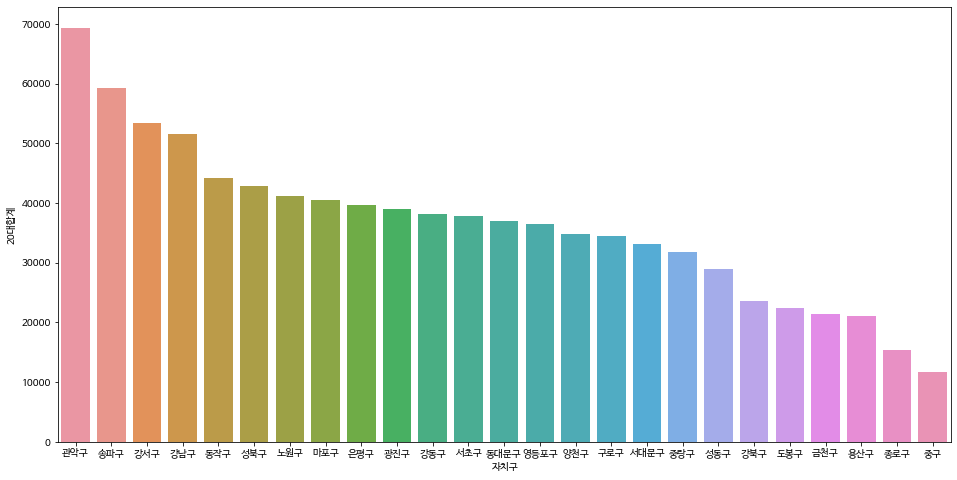

In [66]:
guage_20t['자치구'] = guage_20t.index
plt.figure(figsize = (16, 8))
sns.barplot(data = guage_20t, x = '자치구', y = '20대합계')
plt.show()

주 광고 타겟을 20대 남성과 여성으로 잡았으므로 20대 인구가 가장 많은 구를 파악
관악 송파 강서 강남순으로 많은 것을 볼 수 있다.
